In [1]:
import numpy as np

import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, metrics

from PIL import Image

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from skimage.feature import greycomatrix, greycoprops
from multiprocessing import Pool

from scipy import stats
from skimage import io

from sklearn.preprocessing import OneHotEncoder

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

## Loading Images

In [2]:
# Loading the images data and the respective labels data into images & labels variables

def loadImages():
    images, labels, labelNumbered = [], [], []

    mIndex = 1
    mMainDir = "Crops"

    mCropLabels = os.listdir(mMainDir)
    
    for mCrop in mCropLabels:
        if mCrop.startswith("."):
            d = 0
            mIndex = mIndex - 1
        else:
            for mImage in os.listdir(mMainDir + "/" + mCrop):
                if mImage.startswith("."):
                    s = 0
                else:
                    mImage = np.load(mMainDir + "/" + mCrop + "/" + mImage)
                    images.append(mImage.flatten() )

                    labels.append(mCrop)
                    labelNumbered.append(mIndex)
            #print(mCrop)
        mIndex = mIndex + 1
    
    return images, labels, labelNumbered

In [3]:
images, labels, labelNumbered = loadImages()

image_data=np.array(images,dtype="float32")/255.0
mLabels=np.array(labelNumbered)

In [4]:
image_data.shape, mLabels.shape

((144, 10000), (144,))

## Splitting data set

In [5]:
# Splitting the data set into training and test data

X_train, X_test, y_train, y_test  = train_test_split(images, labelNumbered, train_size=0.7,test_size=0.3, random_state=42)

print("Training data: ", len(X_train) , " Training Labels: ", len(y_train))
print("Testing data: ", len(X_test), " Testing Labels: ", len(y_test) )

print("Sample size is: ", X_train[0].shape)

Training data:  100  Training Labels:  100
Testing data:  44  Testing Labels:  44
Sample size is:  (10000,)


In [6]:
# Function to display confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Classification Alogrithms 

In [7]:
# Naive Bayes Classifier Training and computing predictions on test data

def naive_bayes_classifier(X_train, y_train, X_test, y_test, type_images):

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    
    print("The accuracy of the naive bayes classifier on " + type_images +" images is: " + str(metrics.accuracy_score(y_test, predictions)))

    print("\n\nClassification report of naive bayes classifier for {} images is - \n{}\n".format(type_images,
    metrics.classification_report(y_test, predictions, zero_division=0)))
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predictions)

    class_names = ["Soybean", "Rice", "Wheat-T", "Wheat", "Maize"]
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

    plt.show()

In [8]:
# Random Forest Classifier

def random_forest_classifier(X_train, y_train, X_test, y_test, type_images):    
    rf = RandomForestClassifier(n_estimators = 600, max_depth=300, max_features="sqrt", random_state = 0)

    rf.fit(X_train, y_train)
    
    predictions = rf.predict(X_test)
            
    print("The accuracy of the random forest classifier on " + type_images +" images is: " + str(metrics.accuracy_score(y_test, predictions)))

    print("\n\nClassification report of random forest classifier for {} images is - \n{}\n".format(type_images,
    metrics.classification_report(y_test, predictions, zero_division=0)))
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predictions)

    class_names = ["Soybean", "Rice", "Wheat-T", "Wheat", "Maize"]

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')

    #plt.savefig("SVM_Confusion_Matrix.pdf", format='pdf', bbox_inches='tight')

    plt.show()
    

In [9]:
# Support Vector Machines

def support_vector_machines(X_train, y_train, X_test, y_test, type_images):
    
    clf = svm.LinearSVC(max_iter=100)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print("The accuracy of the support vector machine classifier on " + type_images +" images is: " + str(metrics.accuracy_score(y_test, y_pred)))

    print("\n\nClassification report of support vector machine classifier for {} images is - \n{}\n".format(type_images,
    metrics.classification_report(y_test, y_pred, zero_division=0)))
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    class_names = ["Soybean", "Rice", "Wheat-T", "Wheat", "Maize"]

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')
    
    plt.show()

## Algortihms execution on gray scale images

The accuracy of the naive bayes classifier on gray_scale images is: 0.7954545454545454


Classification report of naive bayes classifier for gray_scale images is - 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       0.67      1.00      0.80        14
           5       1.00      1.00      1.00        11

    accuracy                           0.80        44
   macro avg       0.67      0.80      0.72        44
weighted avg       0.65      0.80      0.71        44





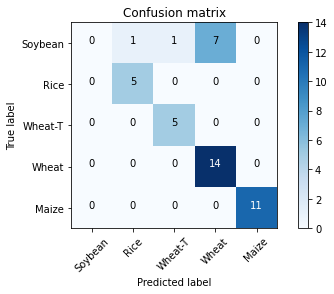

In [10]:
naive_bayes_classifier(X_train, y_train, X_test, y_test, "gray_scale")

The accuracy of the random forest classifier on gray_scale images is: 0.8181818181818182


Classification report of random forest classifier for gray_scale images is - 
              precision    recall  f1-score   support

           1       1.00      0.11      0.20         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.64      1.00      0.78        14
           5       1.00      1.00      1.00        11

    accuracy                           0.82        44
   macro avg       0.93      0.82      0.80        44
weighted avg       0.88      0.82      0.77        44





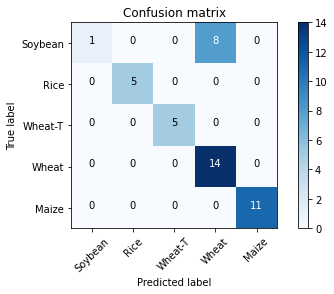

In [11]:
random_forest_classifier(X_train, y_train, X_test, y_test, "gray_scale")

/Users/naveediqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy of the support vector machine classifier on gray_scale images is: 0.7045454545454546


Classification report of support vector machine classifier for gray_scale images is - 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       1.00      1.00      1.00         5
           3       0.62      1.00      0.77         5
           4       0.59      0.93      0.72        14
           5       0.89      0.73      0.80        11

    accuracy                           0.70        44
   macro avg       0.62      0.73      0.66        44
weighted avg       0.59      0.70      0.63        44





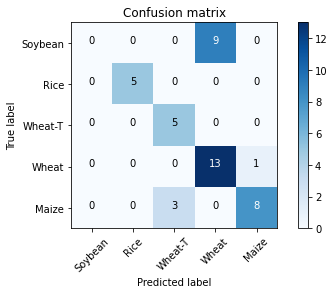

In [12]:
support_vector_machines(X_train, y_train, X_test, y_test, "gray_scale")

## Loading generated GLCM features

In [13]:
m_xTrain = np.zeros((100, 100, 100, 48))

m_xTest = np.zeros((44, 100, 100, 48))

for mCount in np.arange(0, len(X_train)):
    mainDir = "Textures/Train"
    m_xTrain[mCount, :, :, :] = np.load(mainDir + '/field_texture_' + str(mCount) + '.npy')
    
for mCount in np.arange(0, len(X_test)):
    mainDir = "Textures/Test"
    m_xTest[mCount, :, :, :] = np.load(mainDir + '/field_texture_' + str(mCount) + '.npy')
    
m_xTrain.shape, m_xTest.shape

((100, 100, 100, 48), (44, 100, 100, 48))

In [14]:
train_data = []

for mCount in np.arange(0, len(X_train)):
    train_data.append(m_xTrain[mCount, :, :, :].flatten())
    
test_data = []

for mCount in np.arange(0, len(X_test)):
    test_data.append(m_xTest[mCount, :, :, :].flatten())

## Algortihms execution on glcm based images

The accuracy of the naive bayes classifier on glcm images is: 0.9090909090909091


Classification report of naive bayes classifier for glcm images is - 
              precision    recall  f1-score   support

           1       1.00      0.56      0.71         9
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       0.82      1.00      0.90        14
           5       1.00      1.00      1.00        11

    accuracy                           0.91        44
   macro avg       0.93      0.91      0.91        44
weighted avg       0.92      0.91      0.90        44





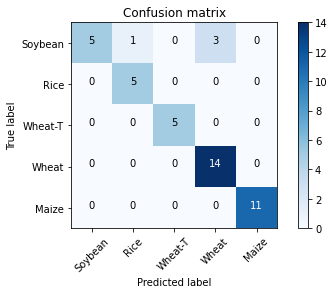

In [15]:
naive_bayes_classifier(train_data, y_train, test_data, y_test, "glcm")

The accuracy of the random forest classifier on glcm images is: 0.9090909090909091


Classification report of random forest classifier for glcm images is - 
              precision    recall  f1-score   support

           1       1.00      0.56      0.71         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.78      1.00      0.88        14
           5       1.00      1.00      1.00        11

    accuracy                           0.91        44
   macro avg       0.96      0.91      0.92        44
weighted avg       0.93      0.91      0.90        44





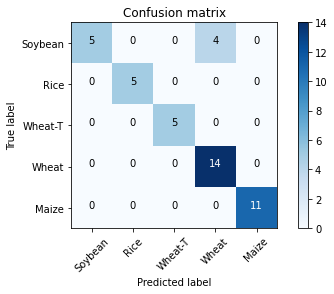

In [16]:
random_forest_classifier(train_data, y_train, test_data, y_test, "glcm")

/Users/naveediqbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuracy of the support vector machine classifier on glcm images is: 0.8409090909090909


Classification report of support vector machine classifier for glcm images is - 
              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       0.80      0.86      0.83        14
           5       1.00      0.82      0.90        11

    accuracy                           0.84        44
   macro avg       0.84      0.87      0.84        44
weighted avg       0.86      0.84      0.84        44





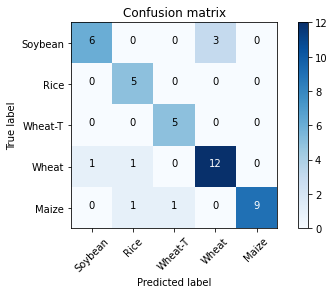

In [17]:
support_vector_machines(train_data, y_train, test_data, y_test, "glcm")